# Clasificación de Pitches de Startups

## Importar dependencias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Aplicar Shape,Columns,head()

In [3]:
a=pd.read_csv('startup_company_one_line_pitches.csv')
print('Dimensiones: ',a.shape)
print('Columnas: ',a.columns)
a.head(10)

Dimensiones:  (3069, 15)
Columnas:  Index(['Startup_ID', 'Company_Name', 'Industry', 'One_Line_Pitch',
       'Founding_Year', 'Headquarters_Location', 'Funding_Stage',
       'Last_Funding_Amount_USD_Millions', 'Number_of_Employees', 'Website',
       'LinkedIn_Profile', 'Twitter_Handle', 'CEO_Name', 'Core_Technology',
       'Market_Size_Billion_USD'],
      dtype='object')


,Startup_ID,Company_Name,Industry,One_Line_Pitch,Founding_Year,Headquarters_Location,Funding_Stage,Last_Funding_Amount_USD_Millions,Number_of_Employees,Website,LinkedIn_Profile,Twitter_Handle,CEO_Name,Core_Technology,Market_Size_Billion_USD
0,1,"Rodriguez, Figueroa and Sanchez",Social Media,Social currencies incentivizing participation ...,2016,"Lake Curtis, Saint Vincent and the Grenadines",Pre-Seed,0.25,NaN,rodriguezfigueroaandsanchez.app,https://linkedin.com/company/rodriguez-figuero...,@rodriguezfig8936,Angie Henderson,Machine Learning,15.0
1,2,Davis and Sons,EdTech,Predictive dropout prevention powered by analy...,2014,"New Jamesside, Italy",Pre-Seed,1.07,8.0,davisandsons.tech,https://linkedin.com/company/davis-and-sons,@davisandsons4558,Kevin Pacheco,Big Data,5.0
2,3,Blake and Sons,SaaS,Cross-border collaboration SaaS optimized for ...,2018,"Petersonberg, Cuba",Series B,NaN,121.0,blakeandsons.ai,https://linkedin.com/company/blake-and-sons,@blakeandsons9892,Gabrielle Davis,Deep Learning,60.0
3,4,Howard LLC,IoT,AI + IoT integration enabling self-healing mac...,2017,"Lindsaymouth, Mauritania",Seed,3.19,20.0,howardllc.io,https://linkedin.com/company/howard-llc,@howardllc1140,Thomas Miller,IoT,10.0
4,5,Calderon-Montgomery,Mobility,Voice-first interfaces for vehicle infotainmen...,2016,"Barbaraland, Aruba",Seed,4.21,13.0,calderonmontgomery.io,https://linkedin.com/company/calderon-montgomery,@calderonmont4375,Patricia Galloway,NLP,15.0
5,6,Delacruz Group,HealthTech,Federated learning safeguarding patient privacy.,2025,"Shawnstad, Central African Republic",Private Equity,195.93,314.0,delacruzgroup.io,https://linkedin.com/company/delacruz-group,@delacruzgrou526,Daniel Adams,Cloud Computing,80.0
6,7,"Wong, Lynch and Jackson",Gaming,Augmented reality overlays in multiplayer sett...,2023,"East Steven, Faroe Islands",Series D,278.64,471.0,wonglynchandjackson.io,https://linkedin.com/company/wong-lynch-and-ja...,@wonglynchand4041,Margaret Hawkins DDS,Quantum Computing,60.0
7,8,Perez Inc,E-commerce,Visual search technology turning images into b...,2023,"Richardland, Croatia",Series A,NaN,NaN,perezinc.com,https://linkedin.com/company/perez-inc,@perezinc2505,Latoya Robbins,NLP,30.0
8,9,Rios Group,Cybersecurity,Micro-segmentation restricting breach spread.,2016,"Thomasberg, Egypt",IPO,874.70,NaN,riosgroup.app,https://linkedin.com/company/rios-group,@riosgroup1877,Kimberly Burgess,5G,60.0
9,10,Hurst-Ross,HealthTech,Respiratory monitoring powered by predictive ML.,2016,"East William, Bermuda",Pre-Seed,1.15,2.0,hurstross.app,https://linkedin.com/company/hurst-ross,@hurstross4890,Shannon Hernandez,Cloud Computing,40.0


## Aplicar describe

In [ ]:
a.describe()

,Startup_ID,Founding_Year,Last_Funding_Amount_USD_Millions,Number_of_Employees,Market_Size_Billion_USD
count,3069.000000,3069.000000,2174.000000,2608.000000,2855.00000
mean,1535.000000,2016.578364,142.266136,575.139187,58.28021
std,886.088314,5.211136,207.375894,940.514767,41.54179
min,1.000000,2008.000000,0.050000,1.000000,5.00000
25%,768.000000,2012.000000,4.445000,29.000000,20.00000
50%,1535.000000,2017.000000,52.940000,190.000000,50.00000
75%,2302.000000,2021.000000,189.900000,659.250000,90.00000
max,3069.000000,2025.000000,998.460000,4977.000000,150.00000


## Limpieza del dataset 

In [54]:
columnas_eliminar = ['Startup_ID', 'Website', 'LinkedIn_Profile', 'Twitter_Handle', 'CEO_Name']
a_limpio = a.drop(columns=columnas_eliminar)

#Eliminar o Arreglar columnas con NaN
num_cols = a_limpio.select_dtypes(include=['float64', 'int64']).columns
obj_cols = a_limpio.select_dtypes(include=['object']).columns


for col in num_cols:
    media = a_limpio[col].mean()
    a_limpio[col] = a_limpio[col].fillna(media)

a_limpio = a_limpio.dropna(subset=obj_cols)

print(f"Forma del DataFrame después de la limpieza: {a_limpio.shape}")
print(f"NaN restantes: {a_limpio.isnull().sum().sum()}")

Forma del DataFrame después de la limpieza: (2733, 10)
NaN restantes: 0


## Graficar Columnas

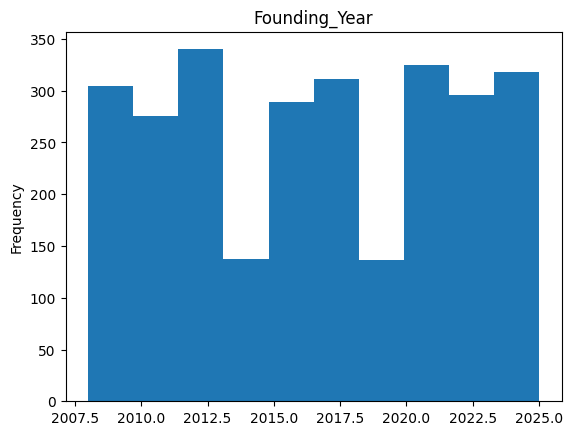

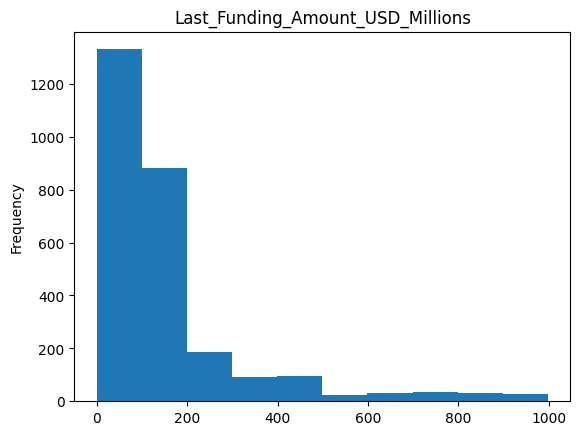

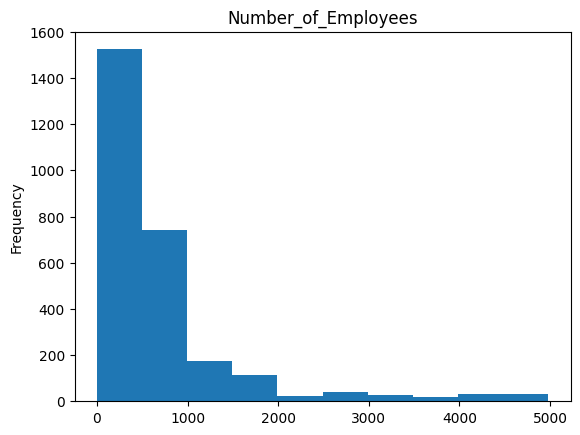

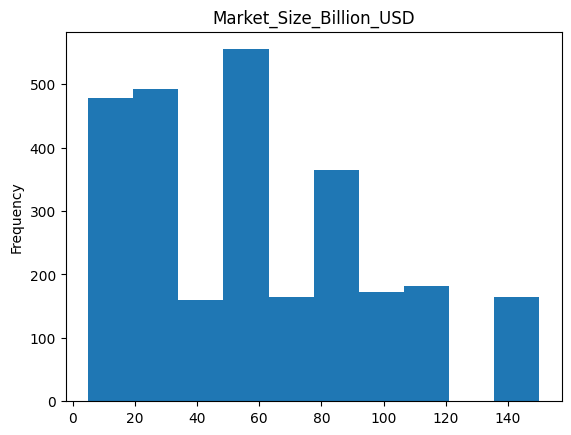

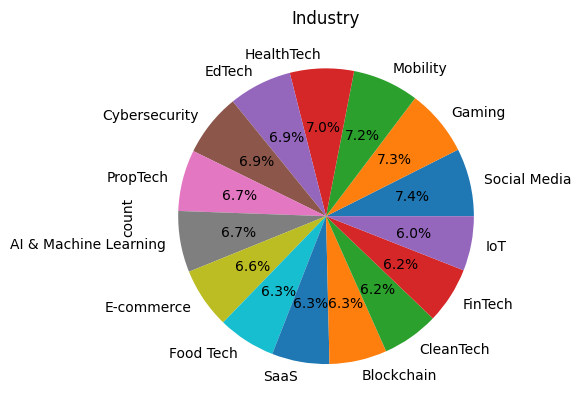

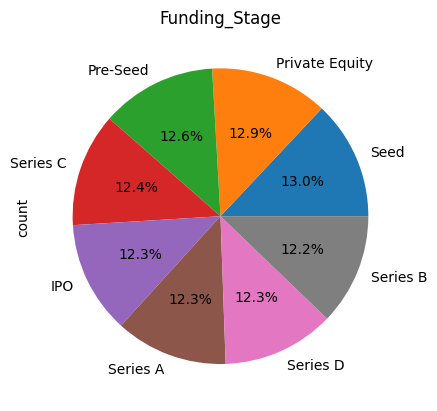

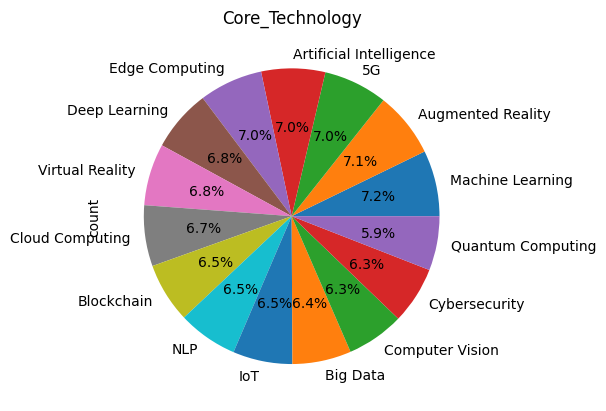

Text(0.5, 1.0, 'Top 15 ubicaciones de startups')

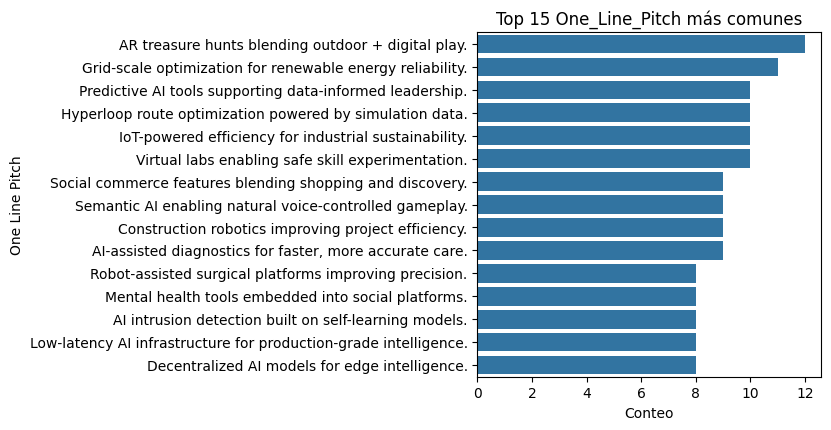

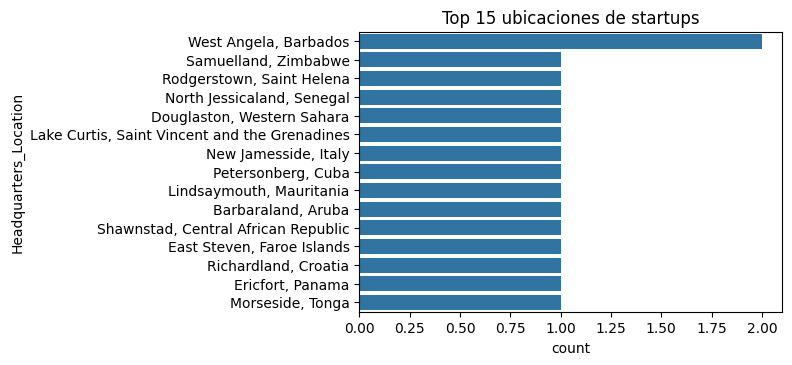

In [75]:
for col in num_cols:
    a_limpio[col].plot(kind='hist', title=col)
    plt.show()

columnas_excluir = ['One_Line_Pitch', 'Headquarters_Location','Company_Name']
obj_cols_filtradas = [col for col in obj_cols if col not in columnas_excluir]
for col in obj_cols_filtradas:
    a_limpio[col].value_counts().plot(kind='pie', title=col, autopct='%1.1f%%')
    plt.show()


top_pitches = a_limpio['One_Line_Pitch'].value_counts().head(15)

plt.figure(figsize=(12, 8))

plt.subplot(2,2,1)
sns.countplot(data=a_limpio[a_limpio['One_Line_Pitch'].isin(top_pitches.index)],y='One_Line_Pitch', order=top_pitches.index)
plt.title('Top 15 One_Line_Pitch más comunes')
plt.xlabel('Conteo')
plt.ylabel('One Line Pitch')
plt.tight_layout()

plt.figure(figsize=(12, 8))
plt.subplot(2,2,1)
top_locations = a_limpio['Headquarters_Location'].value_counts().head(15)
sns.countplot(data=a_limpio[a_limpio['Headquarters_Location'].isin(top_locations.index)],y='Headquarters_Location', order=top_locations.index)
plt.title('Top 15 ubicaciones de startups')


Va a hacer clasificación
